In [126]:
import geopandas as gpd
import rasterio 
import seaborn as sns
import numpy as np
import fiona
import rasterio.mask
import pandas as pd
import matplotlib.pyplot as plt
columns=['Co-Seismic','Post-Monsoon 2015','Pre-Monsoon 2016','Post-Monsoon 2016','Pre-Monsoon 2017','Post-Monsoon 2017','Pre-Monsoon 2018','Post-Monsoon 2018']

In [127]:
PGAQuantiles=gpd.read_file('SpectralProfile/ReclassifiedPGA.shp')
with fiona.open("SpectralProfile/ReclassifiedPGA.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [128]:
PGAQuantiles=PGAQuantiles.to_crs('EPSG:32645')

In [159]:
sus=rasterio.open('SpectralProfile/SusceptibilityOverTime.tif')
area=rasterio.open('SpectralProfile/AreaDenOverTime.tif')
haz=rasterio.open('SpectralProfile/HazardOverTime.tif')
nullras=rasterio.open('SpectralProfile/slopeabove10.tif')

In [175]:
null.min()

-3.4028235e+38

In [201]:
def plotTime(ras,ylim,name):
    qunt1=rasterio.mask.mask(ras, PGAQuantiles.geometry[0], crop=True)
    null1=rasterio.mask.mask(nullras, PGAQuantiles.geometry[0], crop=True)[0].flatten()
    qunt2=rasterio.mask.mask(ras, PGAQuantiles.geometry[1], crop=True)
    null2=rasterio.mask.mask(nullras, PGAQuantiles.geometry[1], crop=True)[0].flatten()
    qunt3=rasterio.mask.mask(ras, PGAQuantiles.geometry[2], crop=True)
    null3=rasterio.mask.mask(nullras, PGAQuantiles.geometry[2], crop=True)[0].flatten()
    qunt4=rasterio.mask.mask(ras, PGAQuantiles.geometry[3], crop=True)
    null4=rasterio.mask.mask(nullras, PGAQuantiles.geometry[3], crop=True)[0].flatten()

    qunt1Flt=qunt1[0].reshape((8,-1))
    print(qunt1Flt.shape)
    nulldel1=null1!=null1.min()
    qunt1Flt=qunt1Flt[:,nulldel1]
    print(nulldel1.shape,qunt1Flt.shape)
    qunt1Fltdel=qunt1Flt.max(axis=0)!=qunt1Flt.max()
    qunt1Flt=qunt1Flt[:,qunt1Fltdel]

    qunt2Flt=qunt2[0].reshape((8,-1))
    nulldel2=null2!=null2.min()
    qunt2Flt=qunt2Flt[:,nulldel2]
    qunt2Fltdel=qunt2Flt.max(axis=0)!=qunt2Flt.max()
    qunt2Flt=qunt2Flt[:,qunt2Fltdel]

    qunt3Flt=qunt3[0].reshape((8,-1))
    nulldel3=null3!=null3.min()
    qunt3Flt=qunt3Flt[:,nulldel3]
    qunt3Fltdel=qunt3Flt.max(axis=0)!=qunt3Flt.max()
    qunt3Flt=qunt3Flt[:,qunt3Fltdel]

    qunt4Flt=qunt4[0].reshape((8,-1))
    nulldel4=null4!=null4.min()
    qunt4Flt=qunt4Flt[:,nulldel4]
    qunt4Fltdel=qunt4Flt.max(axis=0)!=qunt4Flt.max()
    qunt4Flt=qunt4Flt[:,qunt4Fltdel]


    #'solid', 'dashed', 'dashdot', 'dotted'
    plt.figure(figsize=(6, 4), dpi=500)
    ax1=plt.errorbar(columns,qunt4Flt.mean(axis=1), np.std(qunt4Flt,axis=1), linestyle='solid', marker='o',color='darkred')
    ax2=plt.errorbar(columns,qunt3Flt.mean(axis=1), np.std(qunt3Flt,axis=1), linestyle='dashed', marker='^',color='tomato')
    ax3=plt.errorbar(columns,qunt2Flt.mean(axis=1), np.std(qunt2Flt,axis=1), linestyle='dashdot', marker='+',color='goldenrod')
    ax4=plt.errorbar(columns,qunt1Flt.mean(axis=1), np.std(qunt1Flt,axis=1), linestyle='dotted', marker='*',color='forestgreen')
    plt.xticks(rotation = 45,ha='right')
    plt.ylim(ylim)
    ax1.set_label('Q1')
    ax2.set_label('Q2')
    ax3.set_label('Q3')
    ax4.set_label('Q4')
    plt.legend()
    plt.savefig(f"{name}.svg",bbox_inches = "tight")
    plt.show()

/usr/local/lib/python3.8/dist-packages/rasterio/features.py:441: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
/usr/local/lib/python3.8/dist-packages/rasterio/features.py:284: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


(8, 43120)
(43120,) (8, 2809)


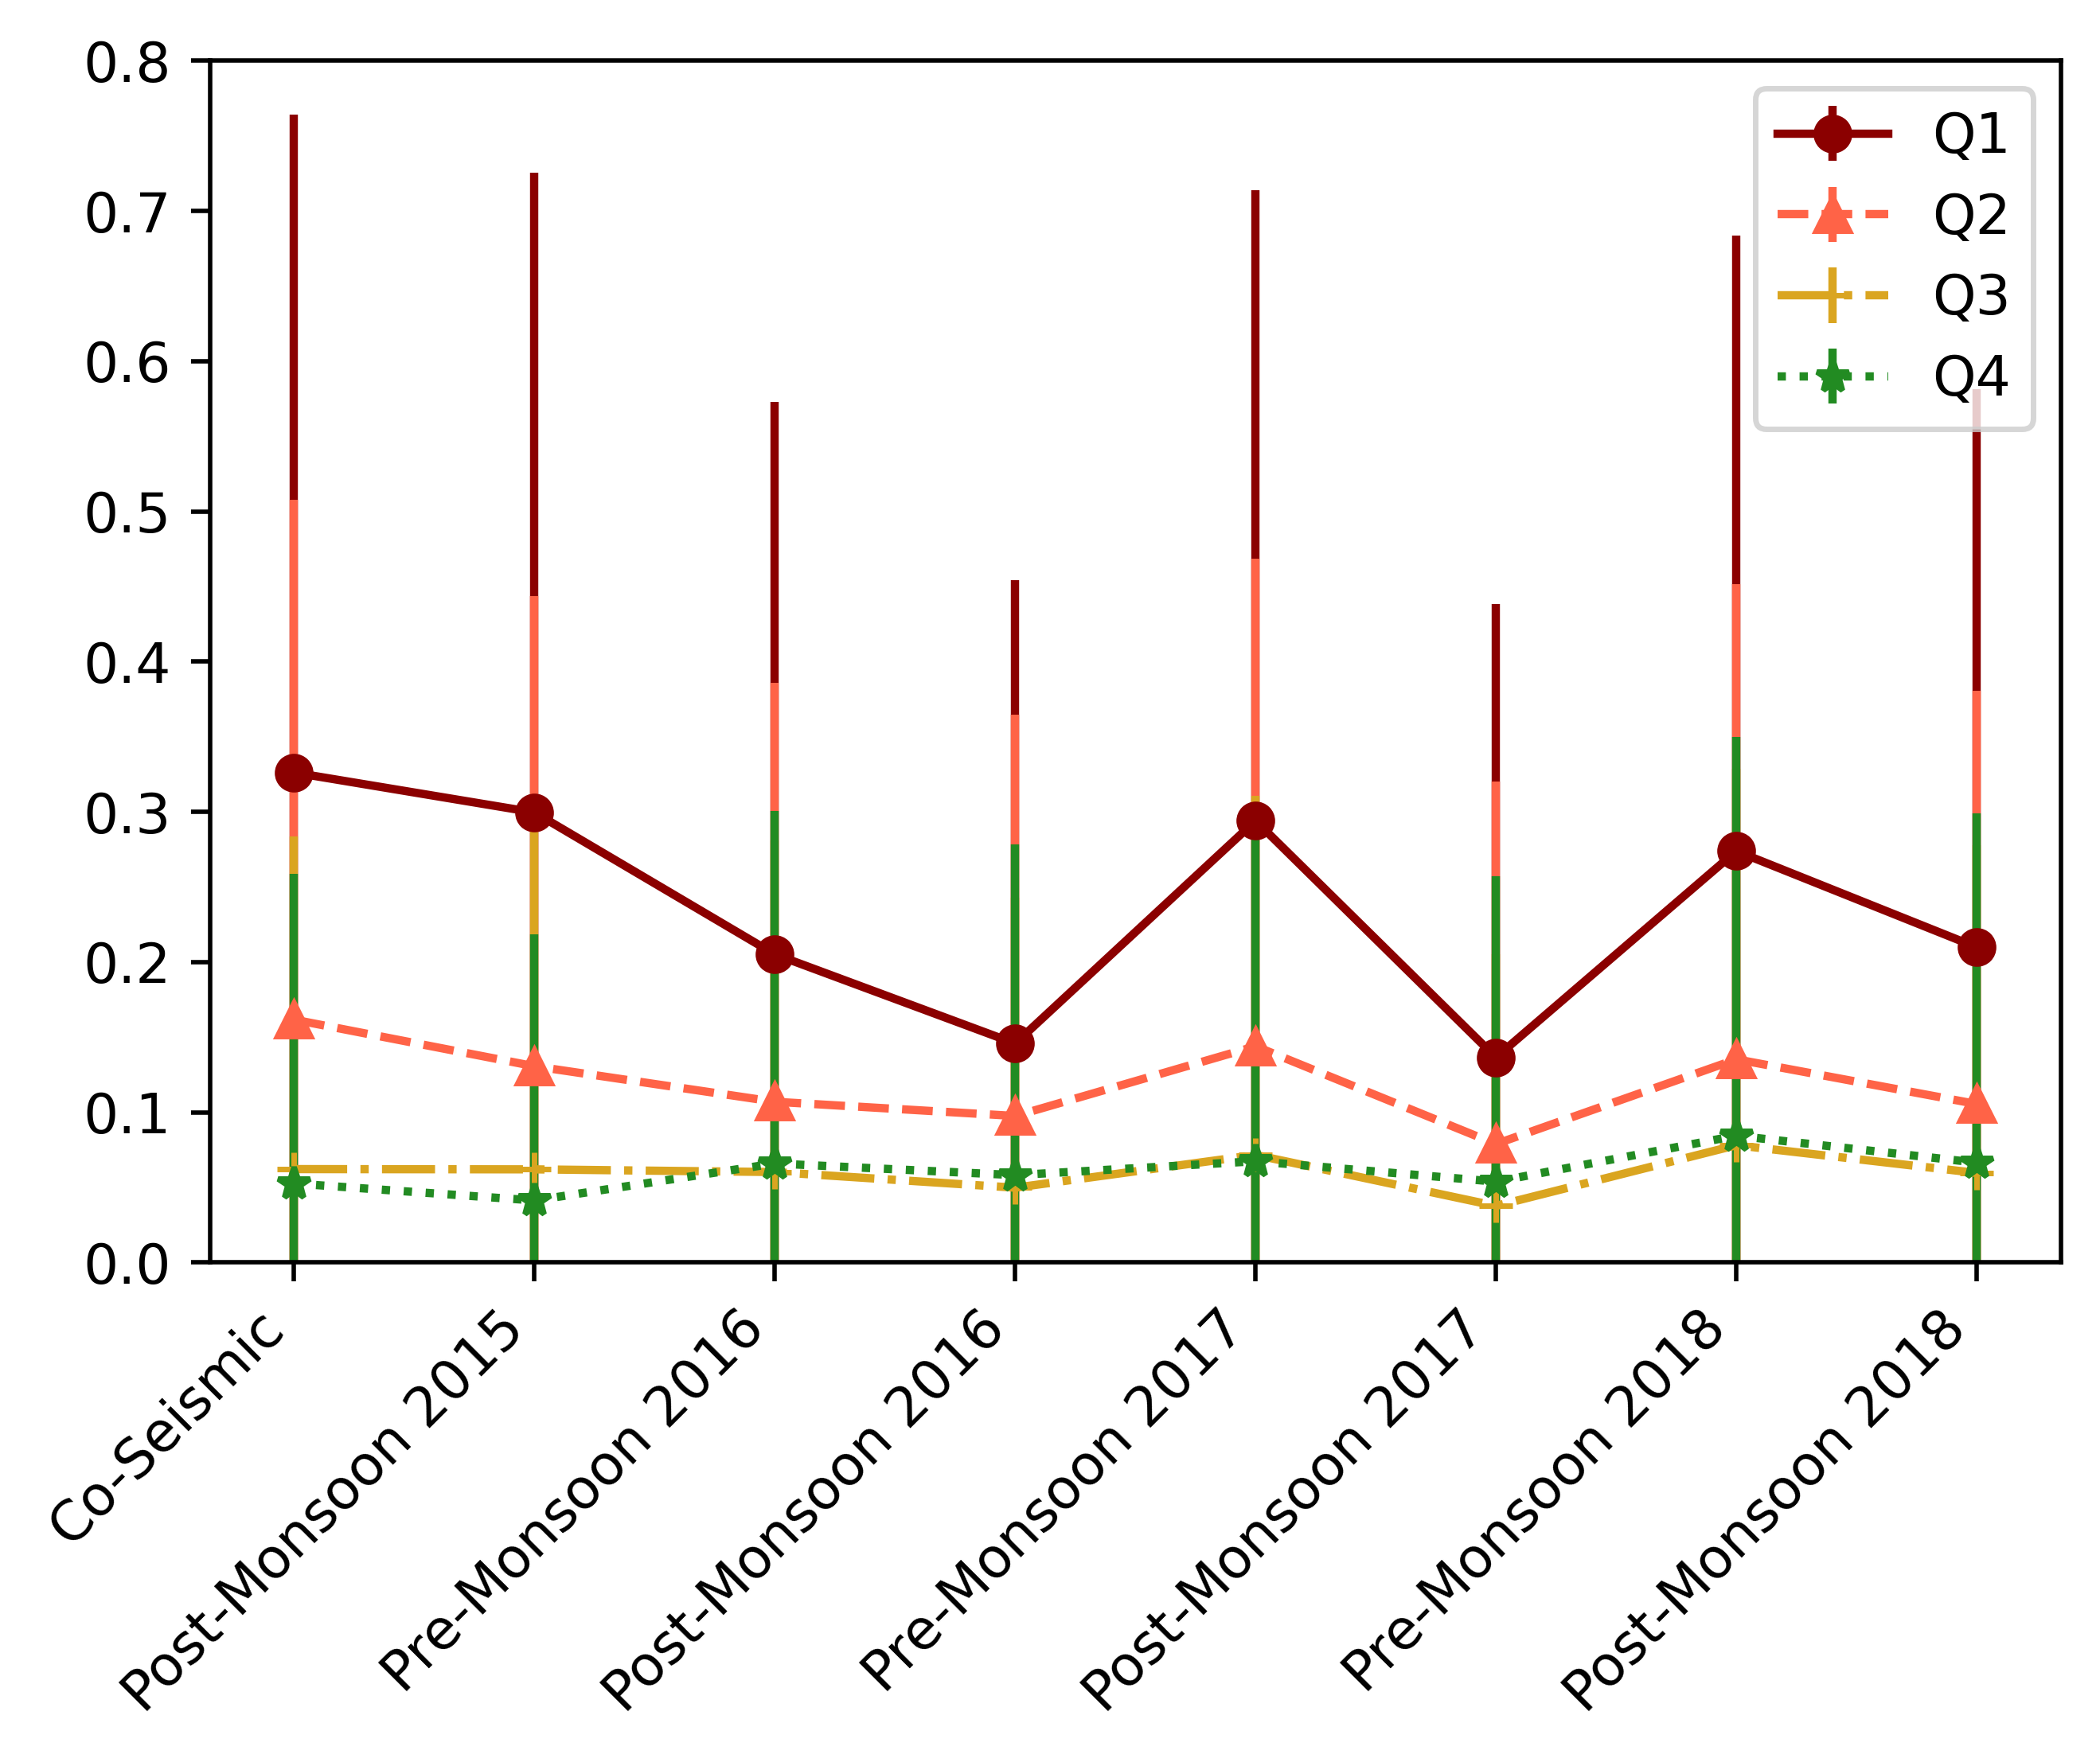

In [202]:
plotTime(sus,[0, 0.8],'Susceptibility_Spectral')

/usr/local/lib/python3.8/dist-packages/rasterio/features.py:441: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
/usr/local/lib/python3.8/dist-packages/rasterio/features.py:284: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


(8, 43120)
(43120,) (8, 2809)


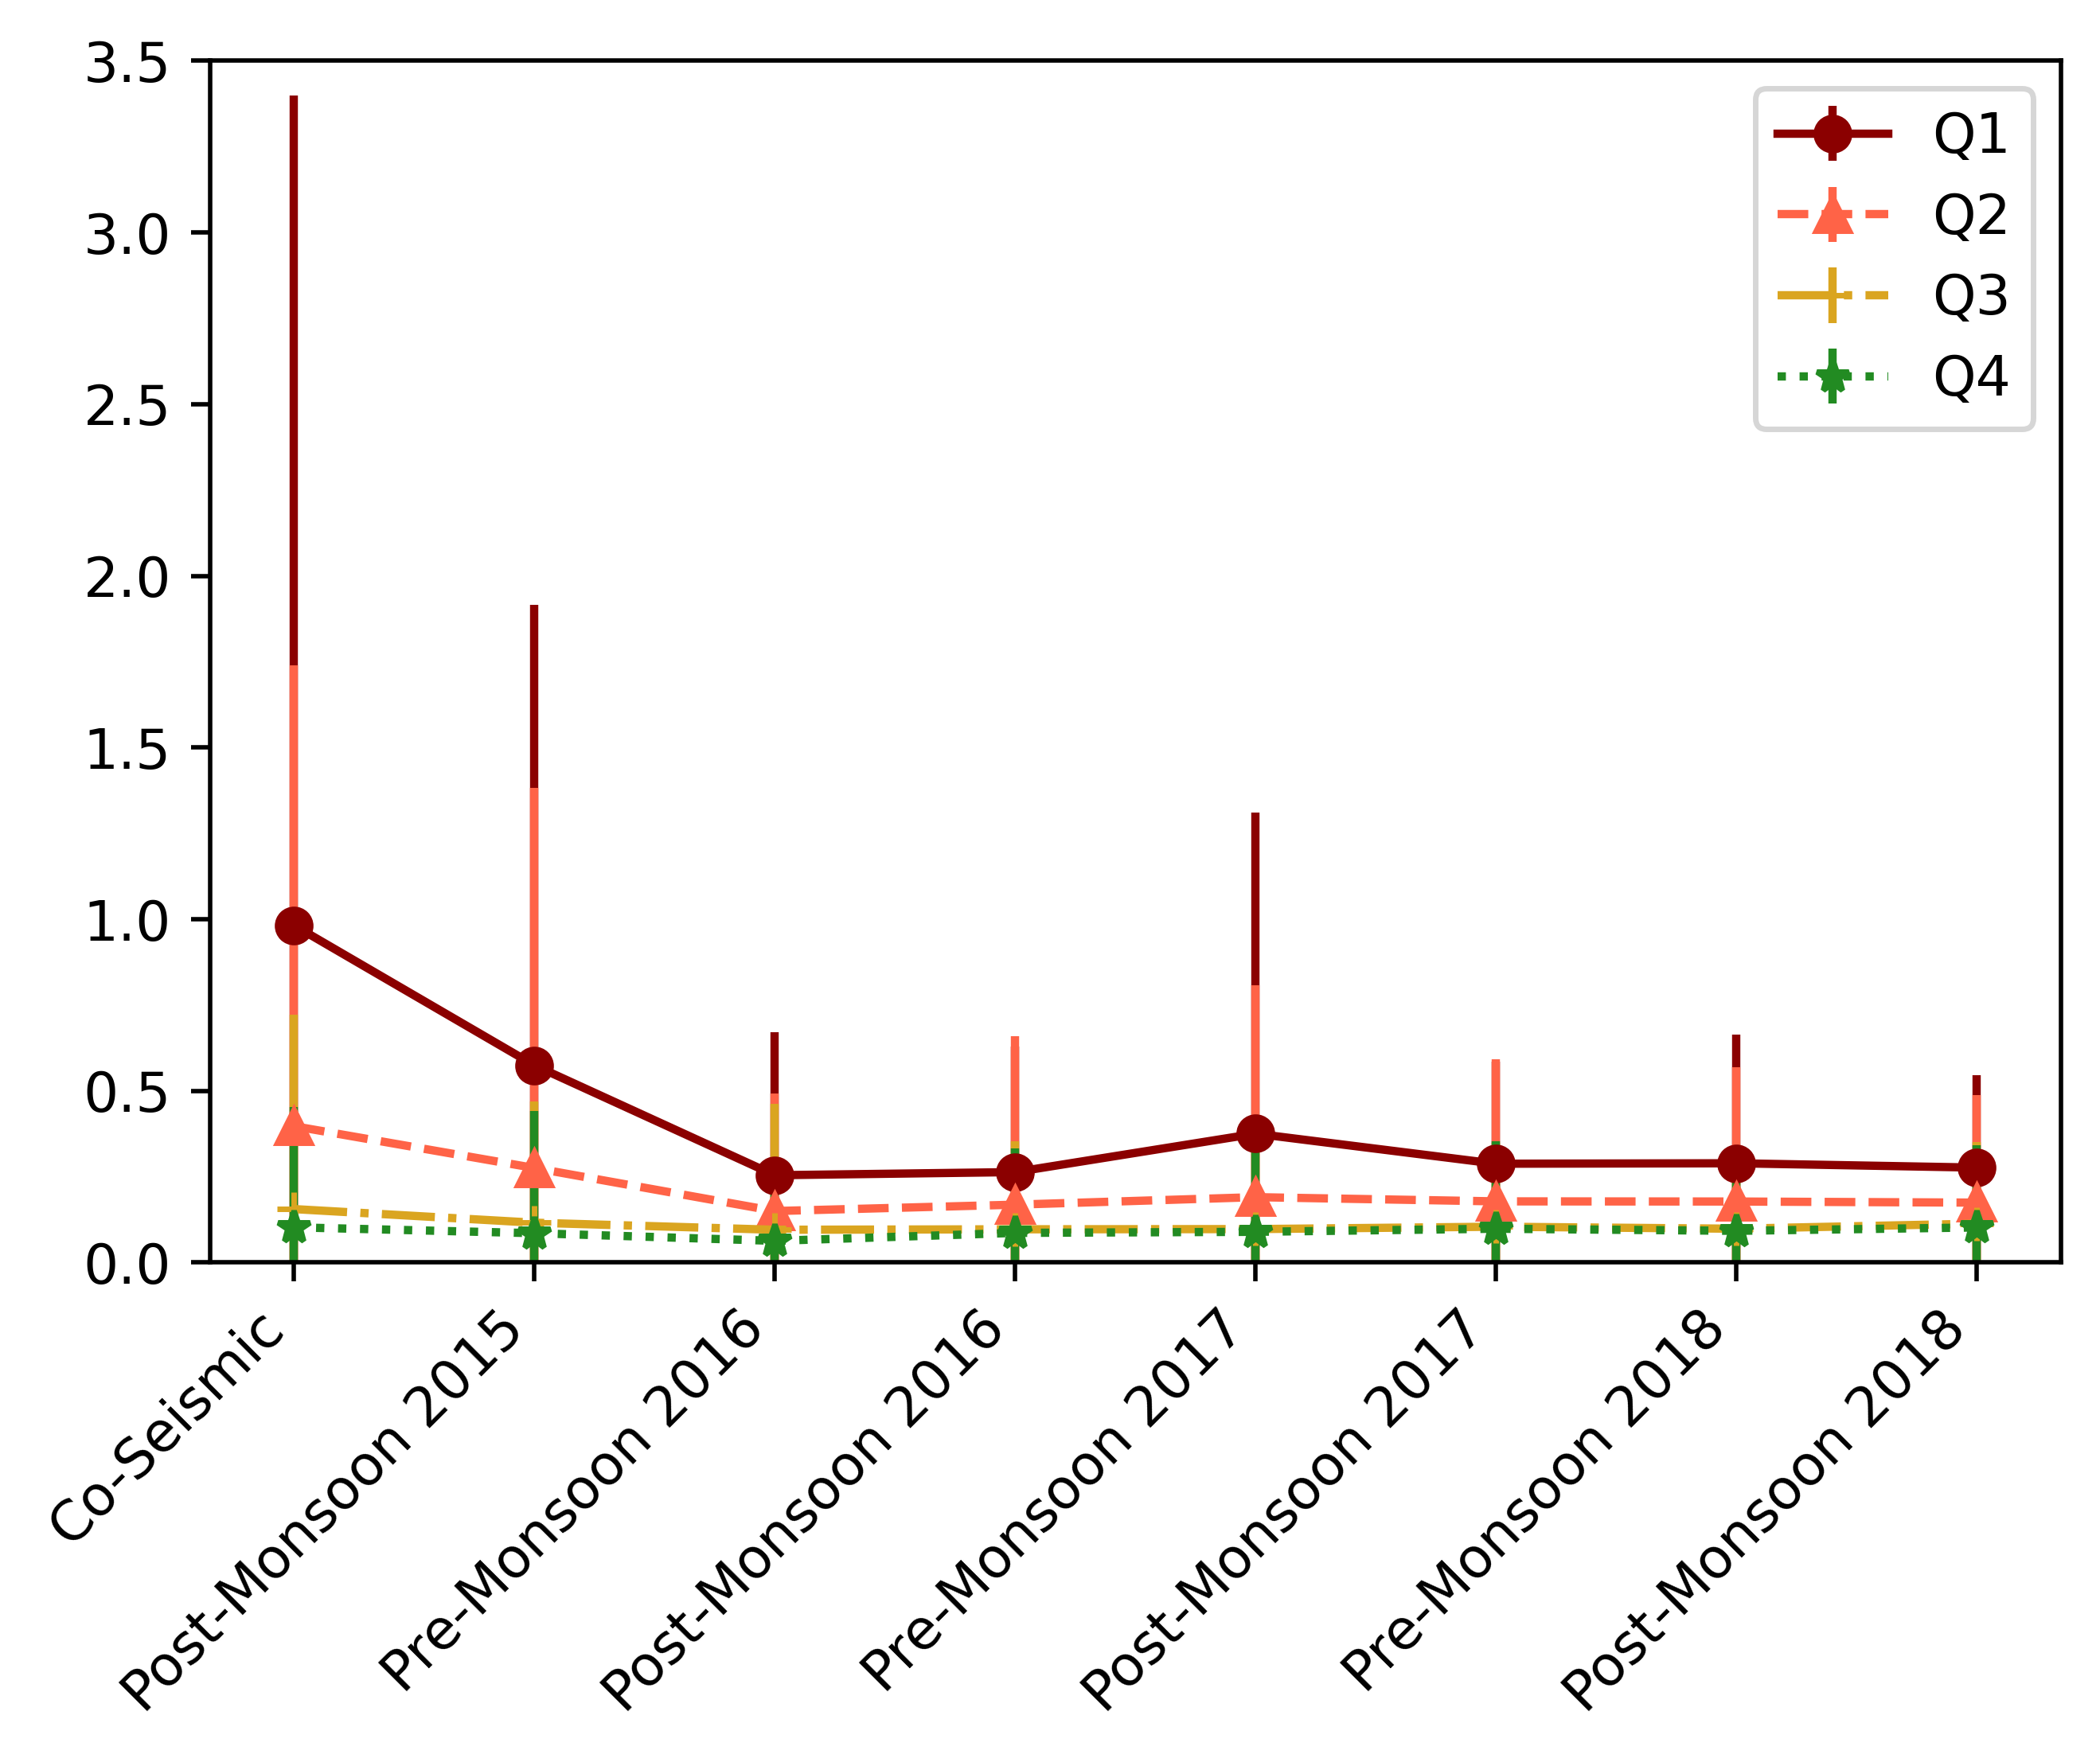

In [203]:
plotTime(area,[0, 3.5],'AreaDensity_Spectral')

/usr/local/lib/python3.8/dist-packages/rasterio/features.py:441: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
/usr/local/lib/python3.8/dist-packages/rasterio/features.py:284: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):


(8, 43120)
(43120,) (8, 2809)


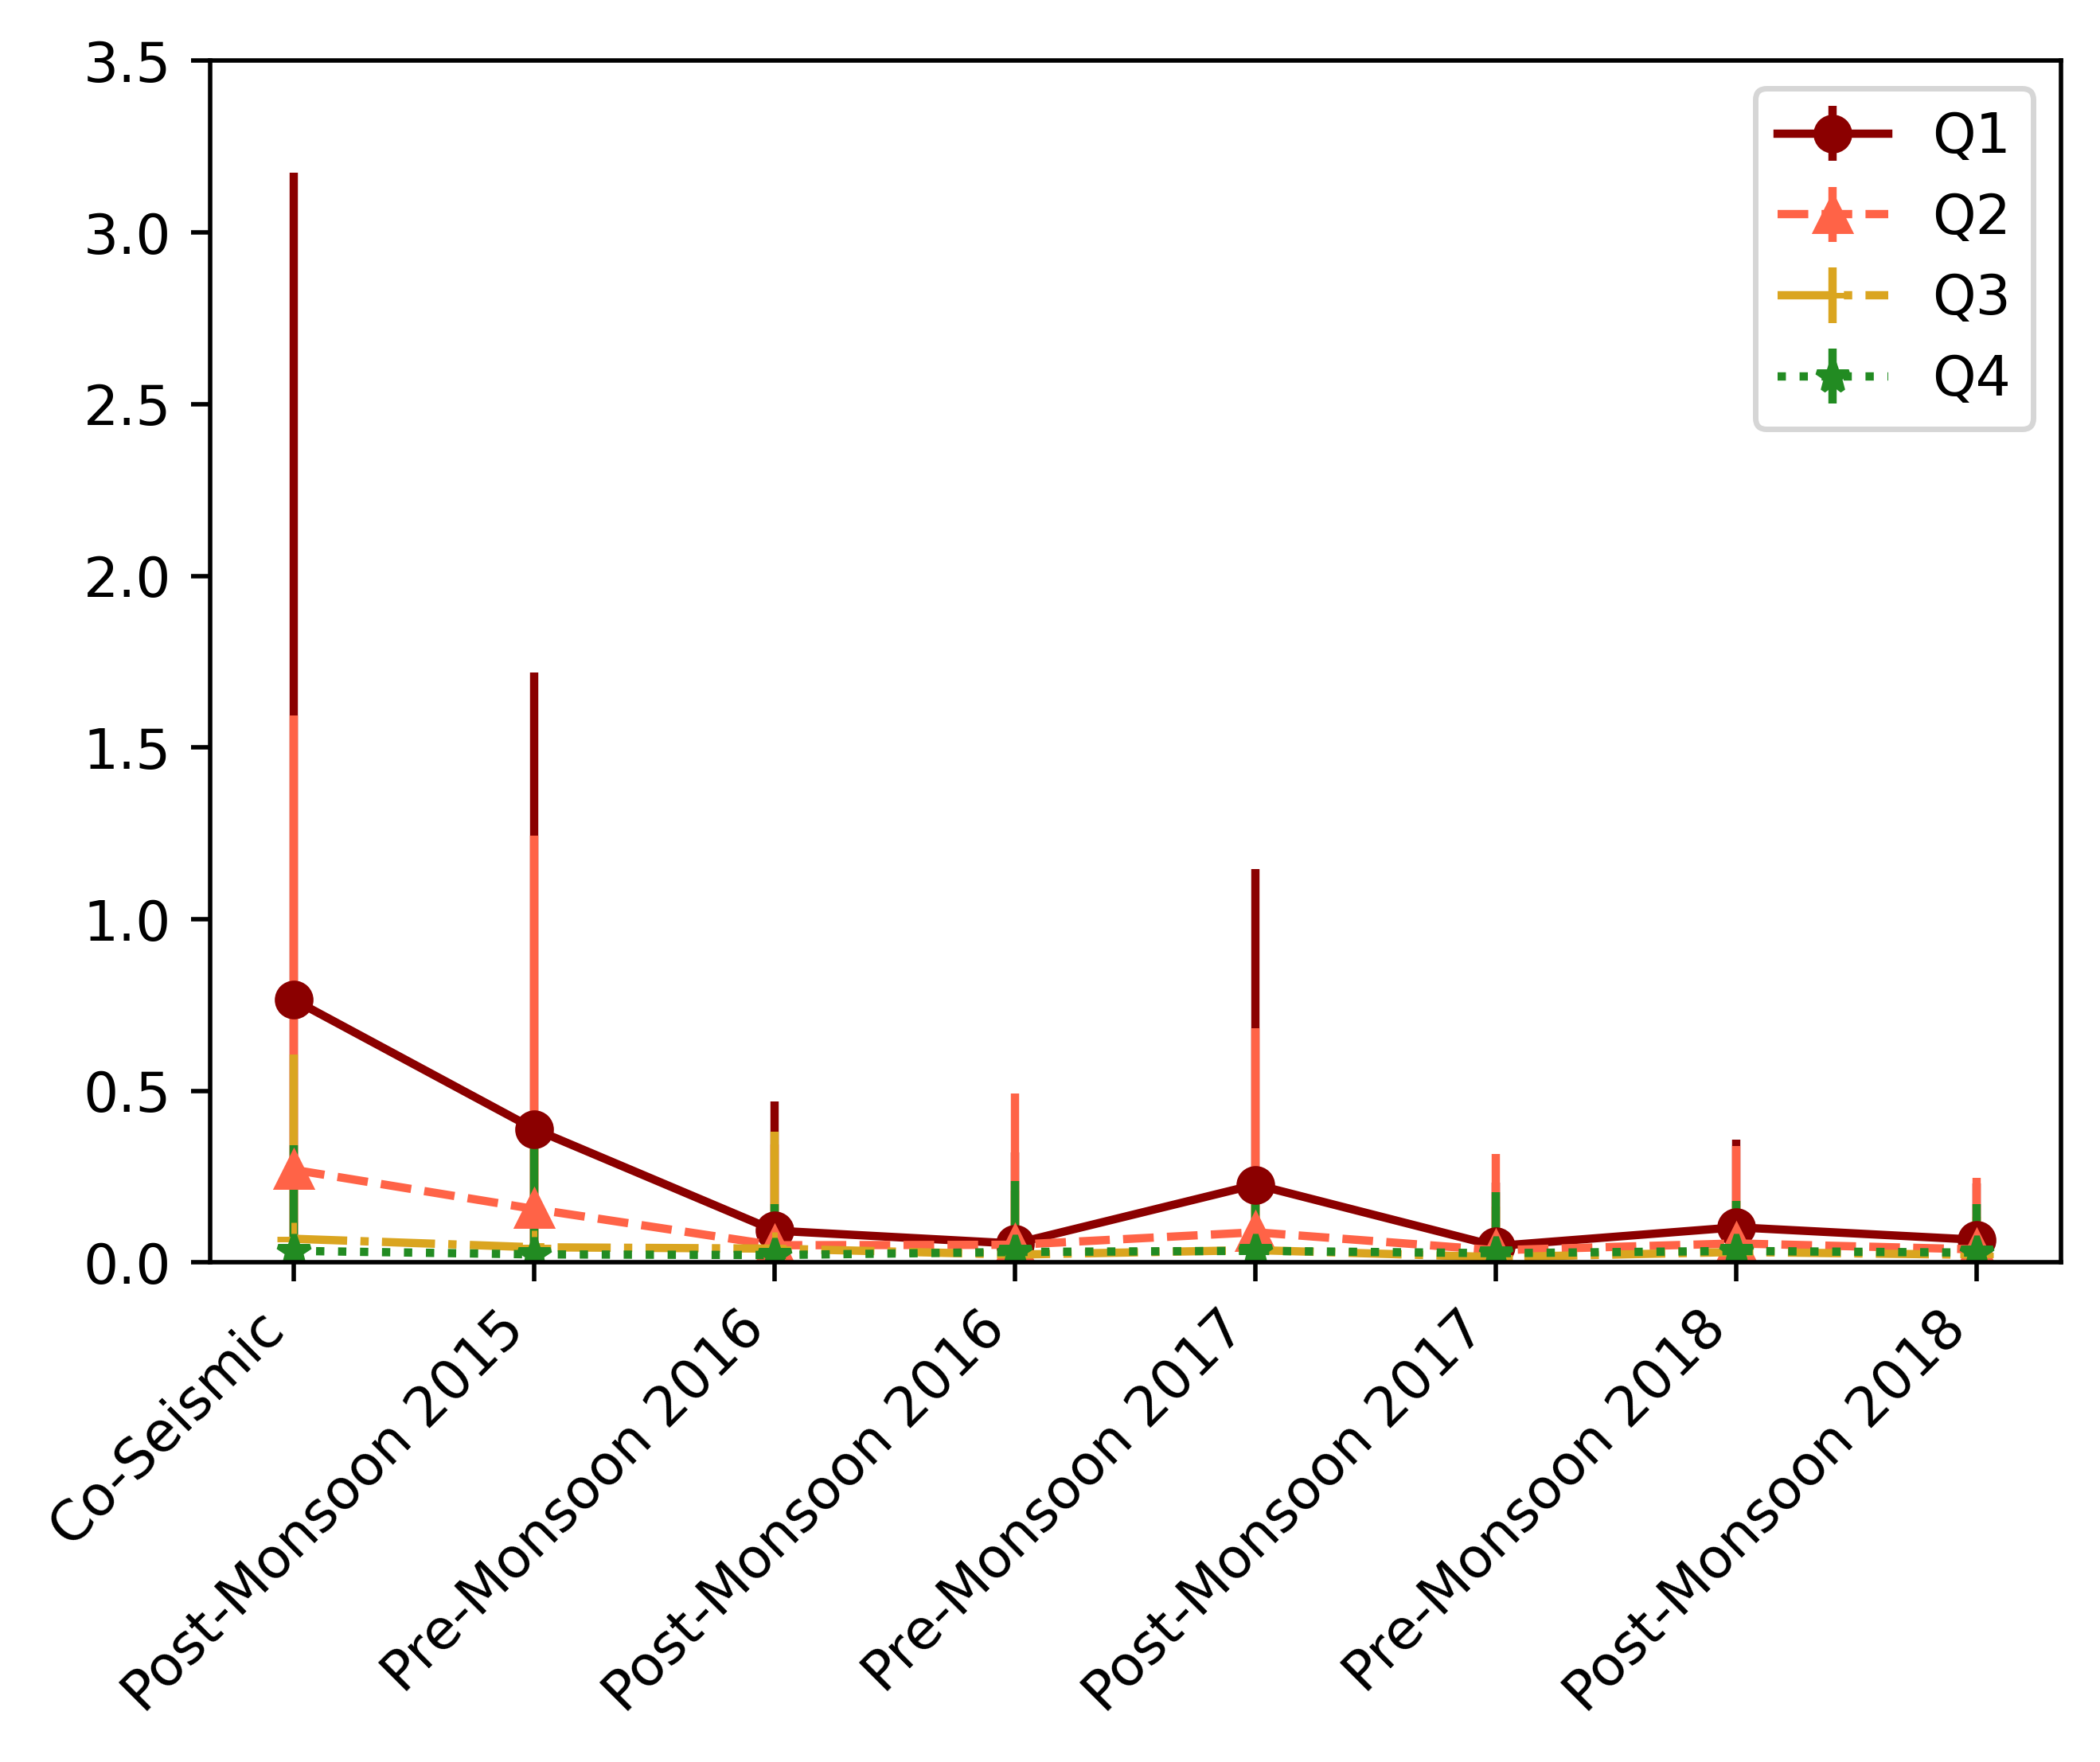

In [204]:
plotTime(haz,[0, 3.5],'Hazard_Spectral')